### Importing Libraries


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, f1_score, precision_score, recall_score, accuracy_score

# GridSearchCV finds the best combinatins of the hyperparameters in a param grid 
from sklearn.model_selection import GridSearchCV

%matplotlib inline

### Loading The Data

In [30]:
data_frame = pd.read_csv("data.csv")
# X,y must be of type of ndArray not a pd.DataFrame
X = data_frame.iloc[:,1:14].values
y = data_frame.iloc[:,-1].values

### Splitting Data

In [31]:
from sklearn.model_selection import train_test_split

# Test set is 20% of the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42) 

### K-Nearest Negihbors

#### Feature Normalization

In [32]:
from sklearn.preprocessing import MinMaxScaler
X_train_norm = MinMaxScaler().fit_transform(X_train)
X_test_norm = MinMaxScaler().fit_transform(X_test)

#### Hyperparameter Tunning

In [33]:
# finding the best K that gives the best score on the validation set
# the size of trainig is 690 so the max_k = 26
max_k = 26
knn_param_grid = {
    "n_neighbors": list(range(1, max_k, 2))
}


In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()

# the score to knn_clf_cv which is the best classifier is Recall
knn_clf_cv = GridSearchCV(
    knn_classifier, knn_param_grid, cv=10, scoring='recall')


#### Training 

In [35]:
# Picks the best classifier out of the 120 classifiers with thew best k for our application
best_knn_clf = knn_clf_cv.fit(X_train_norm,y_train).best_estimator_
best_knn_clf

KNeighborsClassifier(n_neighbors=1)

#### Testing

knn_model_f1-score = 0.5833333333333334
knn_model-precision = 0.6086956521739131
knn_model-Recall = 0.56


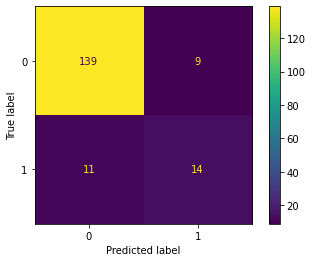

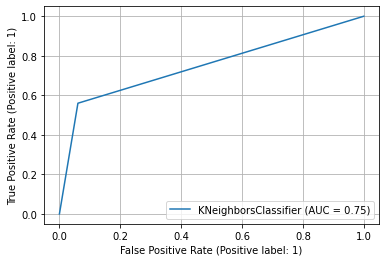

In [36]:
# making predictions
y_pred_knn = best_knn_clf.predict(X_test_norm)

# Confusion Matrix
plot_confusion_matrix(best_knn_clf, X_test_norm, y_test)

# Precision, Recall, f1-score
print(f"knn_model_f1-score = {f1_score(y_test, y_pred_knn)}\nknn_model-precision = {precision_score(y_test,y_pred_knn)}\nknn_model-Recall = {recall_score(y_test,y_pred_knn)}")

# ROC curve
plot_roc_curve(best_knn_clf, X_test_norm, y_test)
plt.grid()

### Logistic Regression


#### Hyperparameter Tunning

In [37]:
# C : 1**-5 -> 1**5 
log_param_grid = {
    "C" : np.logspace(-5, 5, 10)
}

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log_classifier = LogisticRegression()

# the score to log_clf_cv which is the best classifier is Recall
log_clf_cv = GridSearchCV(log_classifier, log_param_grid, cv=10, scoring='recall')


#### Training 

In [ ]:
best_log_clf = log_clf_cv.fit(X_train,y_train).best_estimator_

In [40]:
print(f"{best_log_clf.penalty = }\n{best_log_clf.C = }")

best_log_clf.penalty = 'l2'
best_log_clf.C = 599.4842503189421


#### Testing

log_model_f1-score = 0.7906976744186047
log_model-precision = 0.9444444444444444
log_model-Recall = 0.68


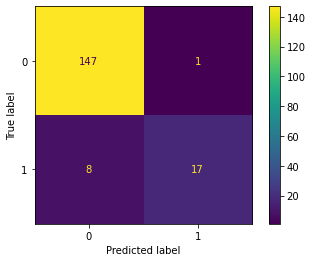

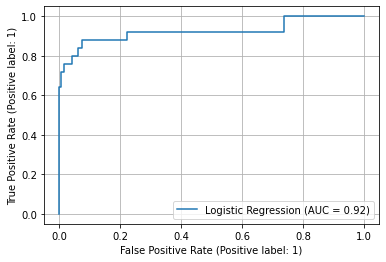

In [41]:
from sklearn.metrics import plot_confusion_matrix, auc, roc_curve, RocCurveDisplay,plot_roc_curve

# making predictions
y_pred_log = best_log_clf.predict(X_test)

# Confusion Matrix
plot_confusion_matrix(best_log_clf, X_test, y_test)

# Precision, Recall, f1-score
print(f"log_model_f1-score = {f1_score(y_test, y_pred_log)}\nlog_model-precision = {precision_score(y_test,y_pred_log)}\nlog_model-Recall = {recall_score(y_test,y_pred_log)}")

# ROC curve
plot_roc_curve(best_log_clf, X_test, y_test, name='Logistic Regression')
plt.grid()



### Naïve Bayes

#### Training with K-Folds

In [45]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
n_splits = 10  

# Recall is more important than precision when the cost of acting is low
score = recall_score

max_recall_score = 0
best_naive_clf = GaussianNB()

kf = KFold(n_splits=n_splits)
for train_index, test_index in kf.split(X_train):

    X_val_train, X_val_test = X_train[train_index], X_train[test_index]
    y_val_train, y_val_test = y_train[train_index], y_train[test_index]

    # create a new KNN model
    naive_clf = GaussianNB()

    # fitting to the y_val_training data
    naive_clf.fit(X_val_train, y_val_train)

    # prediction
    y_val_predicted = naive_clf.predict(X_val_test)

    # The score resulted from the prediction on y_val_test
    cv_score = score(y_true=y_val_test, y_pred=y_val_predicted)
    
    if cv_score > max_recall_score:
        best_naive_clf = naive_clf
        max_recall_score = cv_score

print(f"{best_naive_clf = }\n{max_recall_score = }")

best_naive_clf = GaussianNB()
max_recall_score = 1.0


#### Testing

niave_model_f1-score = 0.38983050847457623
niave_model-precision = 0.24731182795698925
niave_model-Recall = 0.92


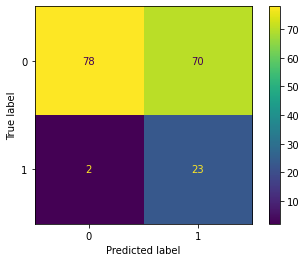

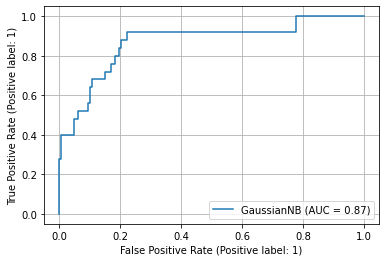

In [46]:
# Testing
y_pred_naive = best_naive_clf.predict(X_test)

# Confusion Matrix 
plot_confusion_matrix(best_naive_clf, X_test, y_test)

# f1-score
print(f"niave_model_f1-score = {f1_score(y_test, y_pred_naive)}\nniave_model-precision = {precision_score(y_test,y_pred_naive)}\nniave_model-Recall = {recall_score(y_test,y_pred_naive)}")

# ROC curve 
plot_roc_curve(best_naive_clf, X_test, y_test)
plt.grid()

### Decision Trees

#### Hyper Parameters Tuning

In [ ]:
# Identifing differenet hyperparameter to tune
DT_param_grid = [
    {
        'criterion': ['gini', 'entropy'],
        'max_depth': list(range(4,13,2))
    }
]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT_classifier = DecisionTreeClassifier()

# the score to DT_clf_cv which is the best classifier is Recall
DT_clf_cv = GridSearchCV(DT_classifier, DT_param_grid, cv=10, scoring='recall')

#### Training 

In [ ]:
best_DT_clf = DT_clf_cv.fit(X_train,y_train).best_estimator_

In [ ]:
print(f"{best_DT_clf.max_depth = }\n{best_DT_clf.criterion = }")

best_DT_clf.max_depth = 10
best_DT_clf.criterion = 'gini'


#### Plotting the DTree

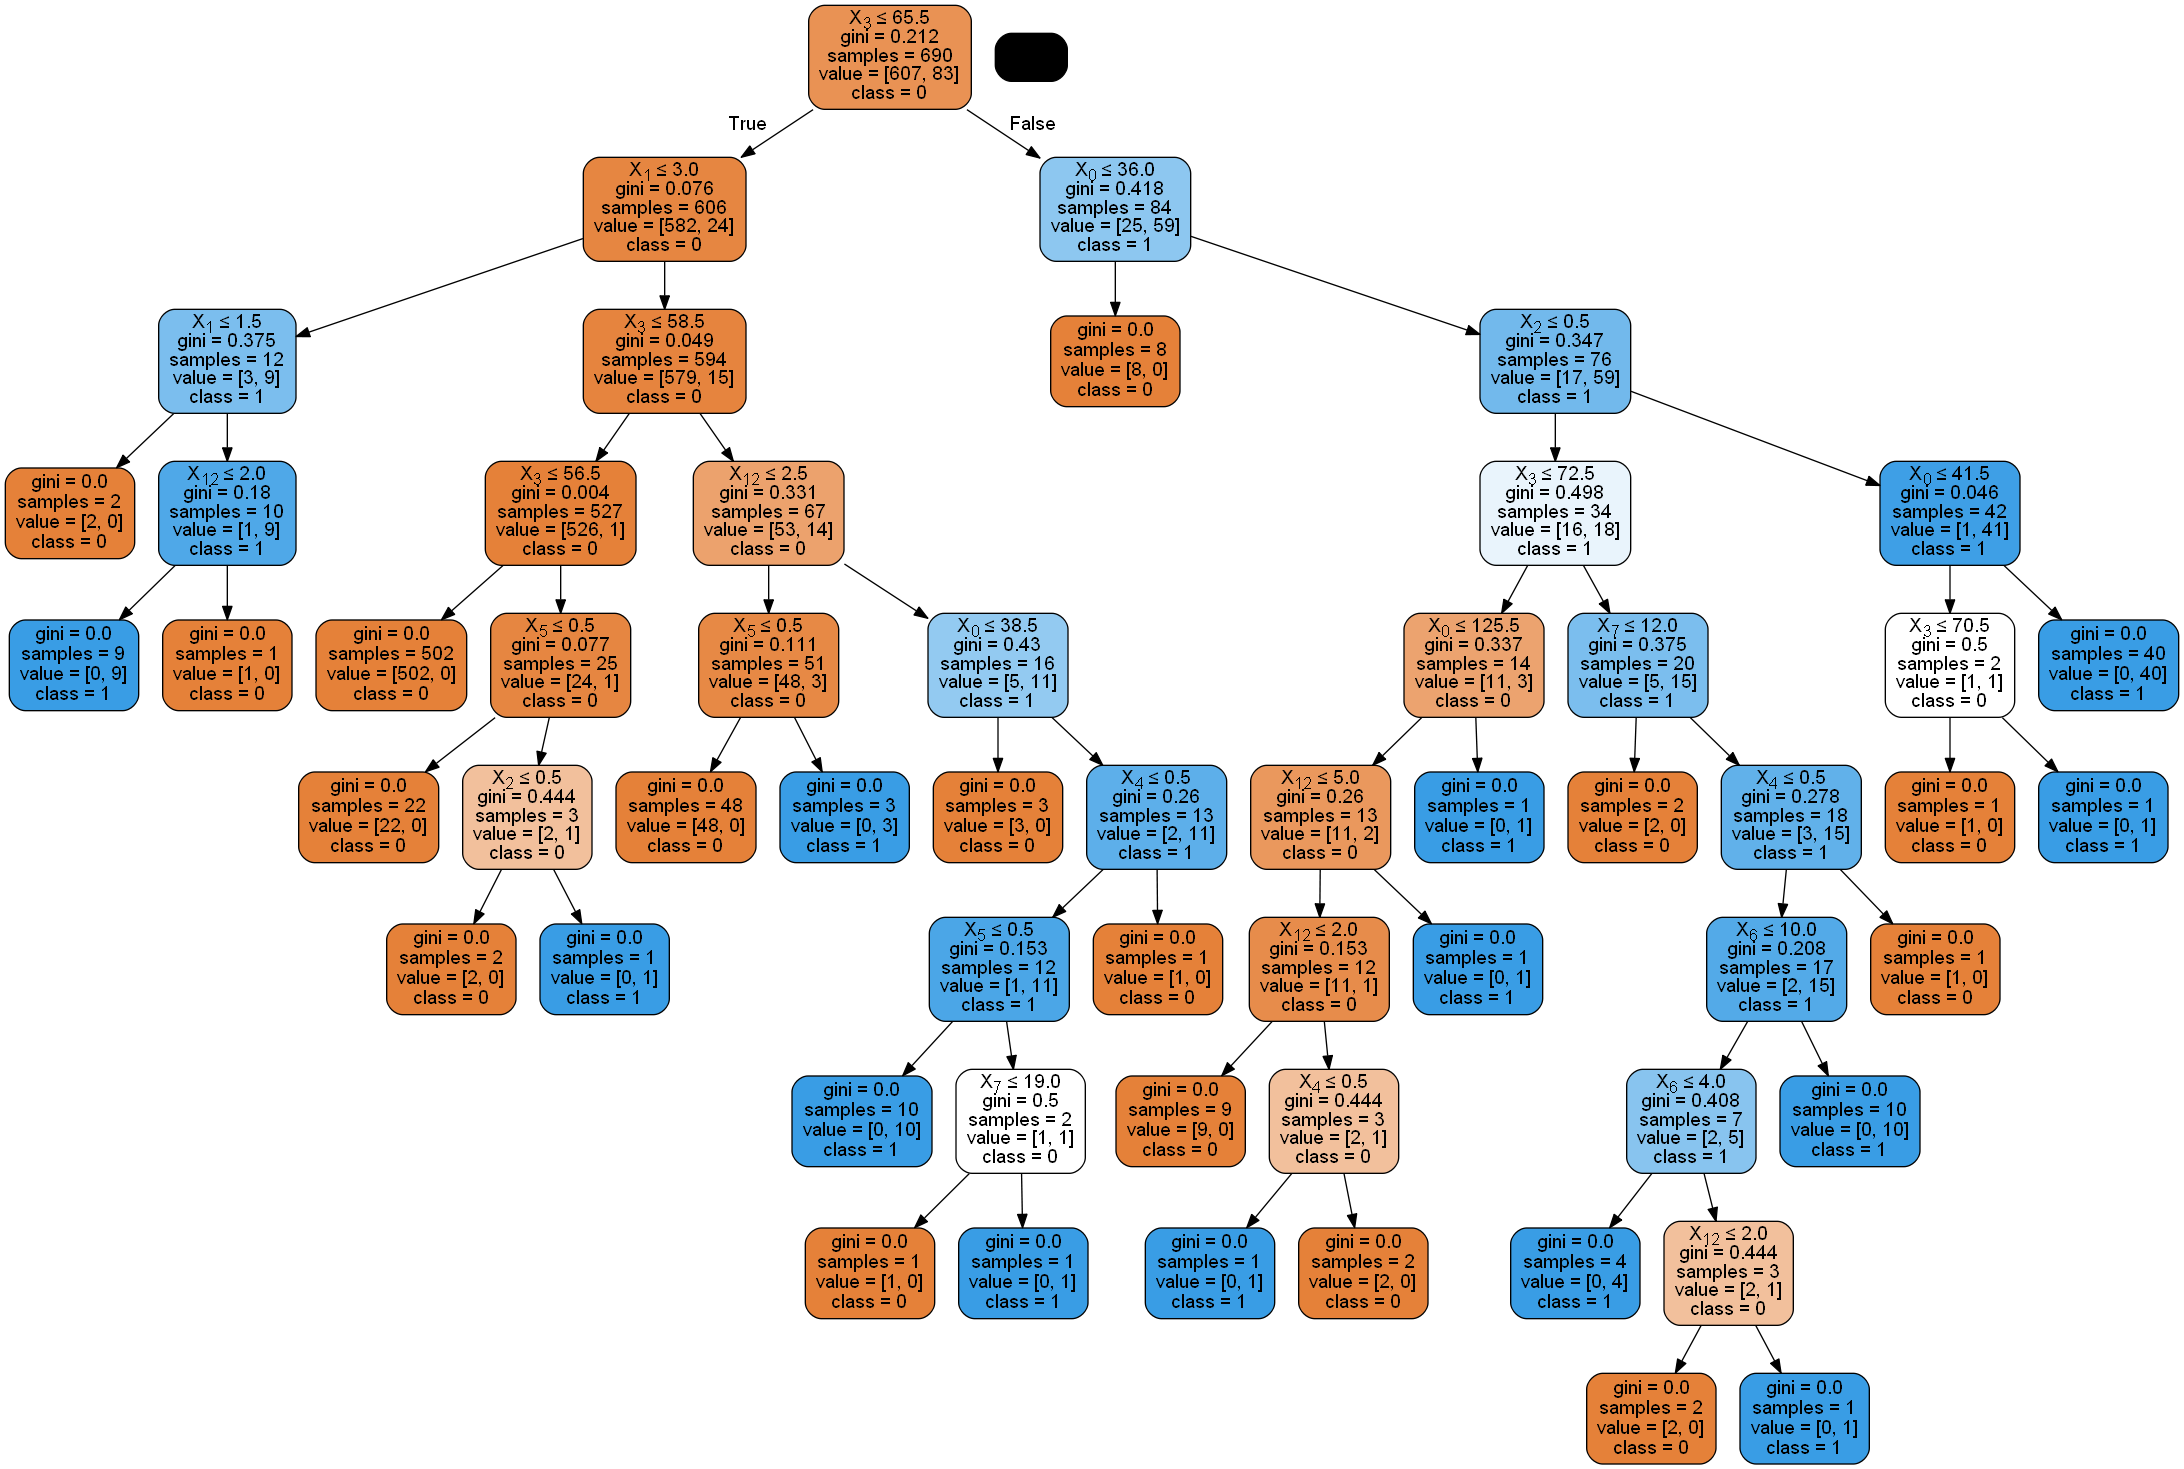

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(best_DT_clf, out_file=dot_data, rounded=True,
                filled=True, special_characters=True, class_names=["0", "1"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("COVID-19.png")
Image(graph.create_png())

#### Testing

DT_model_f1-score = 0.8846153846153846
DT_model-precision = 0.8518518518518519
DT_model-Recall = 0.92


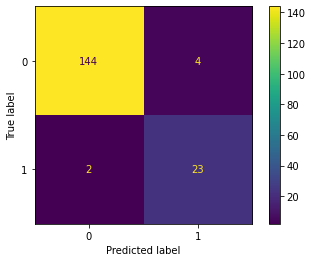

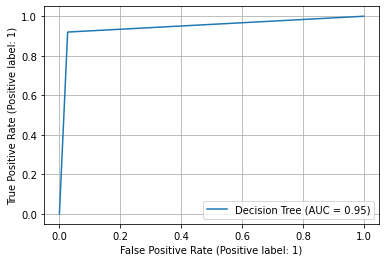

In [ ]:
# making predictions
y_pred_DT = best_DT_clf.predict(X_test)

# Confusion Matrix
plot_confusion_matrix(best_DT_clf, X_test, y_test)

# Precision, Recall, f1-score
print(f"DT_model_f1-score = {f1_score(y_test, y_pred_DT)}\nDT_model-precision = {precision_score(y_test,y_pred_DT)}\nDT_model-Recall = {recall_score(y_test,y_pred_DT)}")

# ROC curve
plot_roc_curve(best_DT_clf, X_test, y_test, name='Decision Tree')
plt.grid()


### Support Vector Machine 

#### Hyperparameter Tunning

In [ ]:
svm_param_grid = {
    "C": np.logspace(-5, 5, 4),
    "kernel": ['poly', 'rbf'],
    "degree": list(range(1,10))
}


In [ ]:
from sklearn.svm import SVC
svm_classifier = SVC()

svm_clf_cv = GridSearchCV(svm_classifier, svm_param_grid, cv=10, scoring='recall')

#### Training 

In [ ]:
best_svm_clf = svm_clf_cv.fit(X_train,y_train).best_estimator_
best_svm_clf

SVC(C=100000.0, degree=4, kernel='poly')

#### Testing

svm_model_f1-score = 0.76
svm_model-precision = 0.76
svm_model-Recall = 0.76


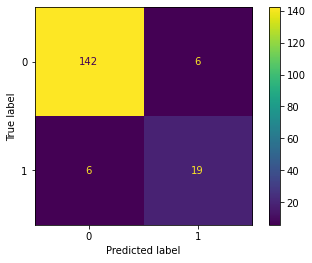

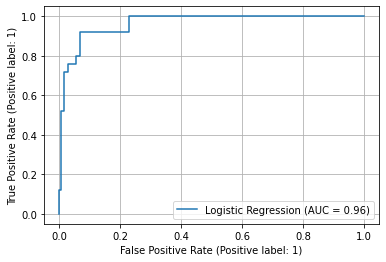

In [ ]:
# making predictions
y_pred_svm = best_svm_clf.predict(X_test)

# Confusion Matrix
plot_confusion_matrix(best_svm_clf, X_test, y_test)

# Precision, Recall, f1-score
print(f"svm_model_f1-score = {f1_score(y_test, y_pred_svm)}\nsvm_model-precision = {precision_score(y_test,y_pred_svm)}\nsvm_model-Recall = {recall_score(y_test,y_pred_svm)}")

# ROC curve
plot_roc_curve(best_svm_clf, X_test, y_test, name='Logistic Regression')
plt.grid()

### Comparisons
 

#### ROC Curve and AUC

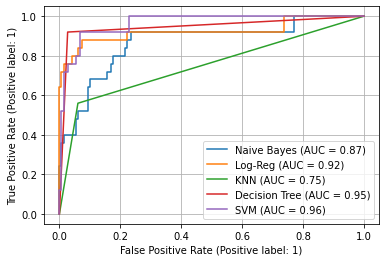

In [ ]:
display = plot_roc_curve(naive_clf, X_test, y_test,name="Naive Bayes")
plot_roc_curve(best_log_clf, X_test, y_test, ax=display.ax_ ,name="Log-Reg")
plot_roc_curve(best_knn_clf,X_test_norm,y_test,ax=display.ax_,name="KNN")
plot_roc_curve(best_DT_clf,X_test,y_test,ax=display.ax_,name="Decision Tree")
plot_roc_curve(best_svm_clf,X_test,y_test,ax=display.ax_,name="SVM")
plt.grid()
plt.show()


#### Accuracy, f1_score, Precision, Recall, AUC

#### This function makes a spider plot which is suitable for our application

In [ ]:
def make_spider(row, title, color):

    # number of variable
    categories = list(df)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(3, 2, row+1, polar=True)

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([.25, .5, 0.75, 1], ["0.25", "0.5",
               "0.75", "1"], color="grey", size=7)
    plt.ylim(0, 1)

    # Ind1
    values = df.loc[row].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=11, color=color, y=1.1)

    


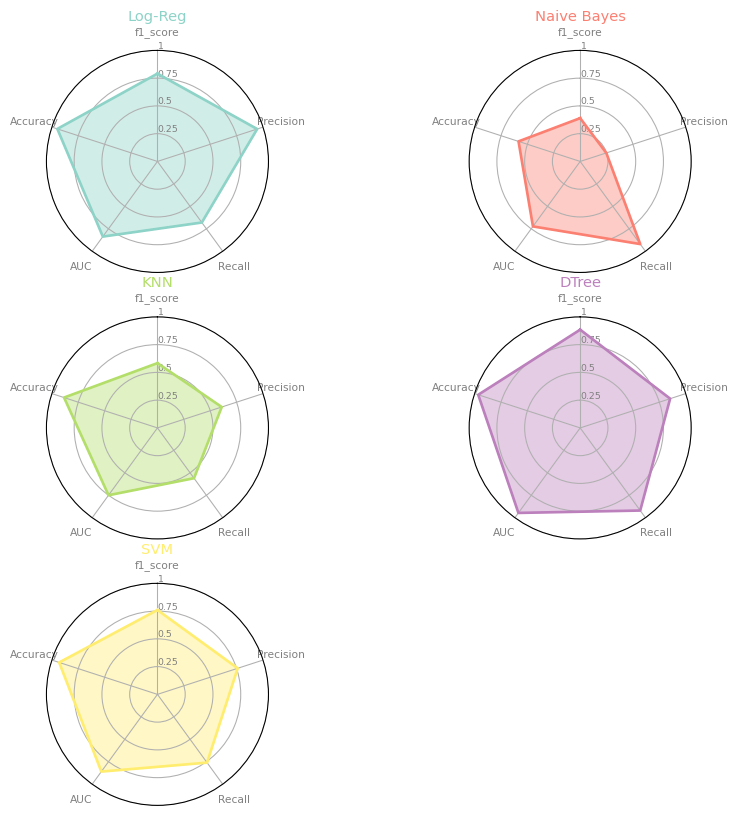

In [ ]:
# Libraries
from math import pi

from sklearn.metrics import roc_auc_score
# Set data
df = pd.DataFrame({
    'group': ['Log-Reg', 'Naive Bayes', 'KNN', 'DTree', 'SVM'],
    'f1_score': [f1_score(y_test, y_pred_log),  f1_score(y_test, y_pred_naive), f1_score(y_test, y_pred_knn), f1_score(y_test, y_pred_DT), f1_score(y_test, y_pred_svm)],
    'Precision': [precision_score(y_test, y_pred_log),  precision_score(y_test, y_pred_naive), precision_score(y_test, y_pred_knn), precision_score(y_test, y_pred_DT), precision_score(y_test, y_pred_svm)],
    'Recall': [recall_score(y_test, y_pred_log),  recall_score(y_test, y_pred_naive),  recall_score(y_test, y_pred_knn),  recall_score(y_test, y_pred_DT),  recall_score(y_test, y_pred_svm)],
    'AUC': [roc_auc_score(y_test, y_pred_log),  roc_auc_score(y_test, y_pred_naive),  roc_auc_score(y_test, y_pred_knn), roc_auc_score(y_test, y_pred_DT), roc_auc_score(y_test, y_pred_svm)],
    'Accuracy':  [accuracy_score(y_test, y_pred_log),  accuracy_score(y_test, y_pred_naive),  accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_DT), accuracy_score(y_test, y_pred_svm)]
})



# ------- PART 2: Apply the function to all individuals
# initialize the figure
my_dpi = 96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)

# Create a color palette:
my_palette = plt.cm.get_cmap("Set3", len(df.index))

# Loop to plot
for row in range(0, len(df.index)):
    make_spider(row=row, title=df['group'][row], color=my_palette(row))
